<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 4: Visualizations

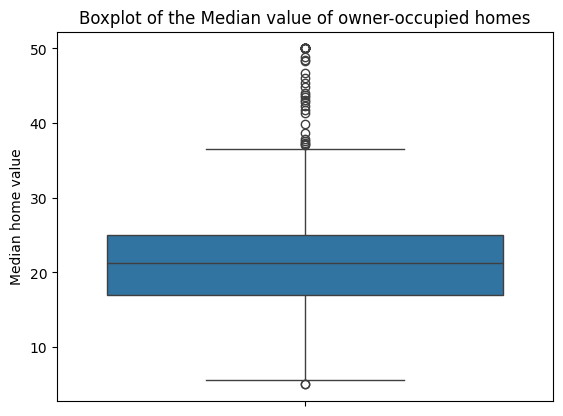

In [114]:
ax = sns.boxplot(y='MEDV', data=boston_df).set(title="Boxplot of the Median value of owner-occupied homes", ylabel="Median home value")
plt.show()

In [54]:
print("The median value of the owner-occupied homes is {}.\nThe interquartile range is relatively narrow, ranging from {} to {}.\nThere are quite a lot of outliers above the upper fence".format(
    boston_df.MEDV.median(), boston_df.MEDV.quantile(0.25), boston_df.MEDV.quantile(0.75), boston_df.MEDV.quantile(0.95)))

The median value of the owner-occupied homes is 21.2.
The interquartile range is relatively narrow, ranging from 17.025 to 25.0.
There are quite a lot of outliers above the upper fence


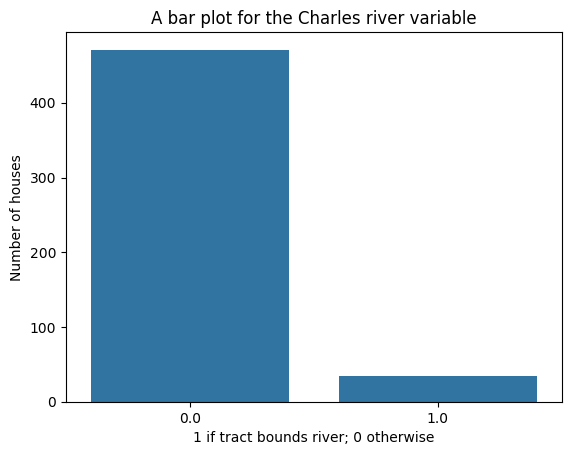

In [61]:
#sns.set(style="whitegrid")
ax = sns.countplot(boston_df, x="CHAS").set(title="A bar plot for the Charles river variable", xlabel="1 if tract bounds river; 0 otherwise", ylabel="Number of houses")
plt.show()

In [67]:
print("There are {} houses bounded by the river and {} houses that do not bound it".format(boston_df[boston_df.CHAS == 1].shape[0], boston_df[boston_df.CHAS == 0].shape[0]))

There are 35 houses bounded by the river and 471 houses that do not bound it


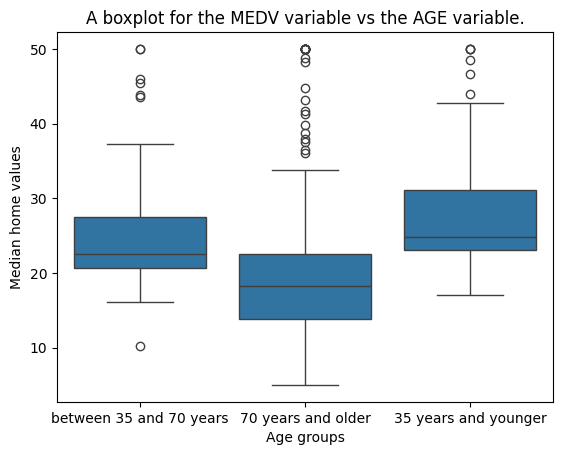

In [70]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df).set(title="A boxplot for the MEDV variable vs the AGE variable.", xlabel="Age groups", ylabel="Median home values")
plt.show()

In [118]:
print("The older homes are visibly less valued than the newer ones.\nFor the three age groups - less than 35, between 35 and 70, and above 70, the median values are respectively: {}, {}, and {}.".format(
    boston_df[boston_df.age_group == "35 years and younger"].MEDV.median(),
    boston_df[boston_df.age_group == "between 35 and 70 years"].MEDV.median(),
    boston_df[boston_df.age_group == "70 years and older"].MEDV.median()))

The older homes are visibly less valued than the newer ones.
For the three age groups - less than 35, between 35 and 70, and above 70, the median values are respectively: 24.8, 22.6, and 18.2.


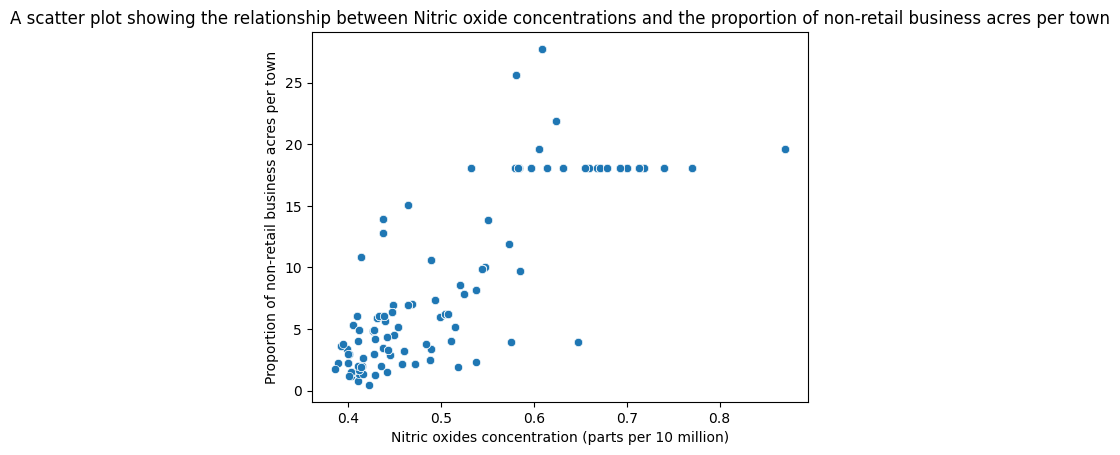

In [99]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(
    title="A scatter plot showing the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town",
    xlabel="Nitric oxides concentration (parts per 10 million)",
ylabel="Proportion of non-retail business acres per town")
plt.show()

The points on the scatter plot are concentrated along a line, suggesting there's a positive correlation between the Nitrix oxides concentration and the proportion of non-retail business.

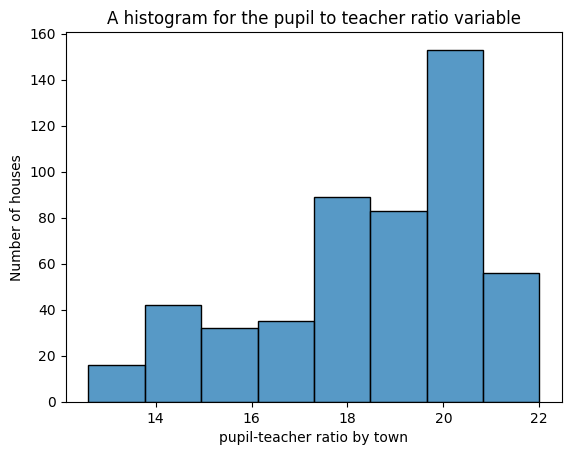

In [113]:
sns.histplot(x='PTRATIO', data=boston_df, bins=8).set(
    title="A histogram for the pupil to teacher ratio variable",
    xlabel="pupil-teacher ratio by town",
    ylabel="Number of houses")
plt.show()

The histogram shows that there are more houses in the towns with higher pupil to teacher ratio.

## Task 5 - hypothesis testing

### **Question 1**: Is there a significant difference in median value of houses bounded by the Charles river or not?

Hypothesis:

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in the median value of houses bounded by the Charles river and houses not bounded by it")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in the median value of houses bounded by the Charles river and houses not bounded by it")

Let's set α = 0.05 and use a T-test for independent samples.

In [19]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** \
Since the p-value is **less** than alpha value 0.05, we **reject the null hypothesis** as there is enough proof that **there is a statistical difference** in the median value of houses depending on whether they are bounded by the Charles river or not.


### **Question 2:** Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

The houses are split into three categories depending on their age:
* 35 years and younger
* between 35 and 70 years
* 70 years and older


Hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

Let's set α = 0.05 and use an ANOVA test.

In [23]:
boston_35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
boston_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
boston_70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [25]:
f_statistic, p_value = scipy.stats.f_oneway(boston_35, boston_35_70, boston_70)
print("f-Statistic: {0}, p-Value: {1}".format(f_statistic,p_value))

f-Statistic: 36.40764999196599, p-Value: 1.7105011022702984e-15


**Conclusion:** \
Since the p-value is **less** than 0.05, we will **reject the null hypothesis** as **there is significant evidence** that at least one of the means differ.

### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Hypothesis:
*   $H\_0:$ Nitric oxide concentration is not correlated with the proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentration is correlated with the proportion of non-retail business acres per town

Let's set α = 0.05 and use Pearson Correlation test.

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** \
Since the p-value is **less** than 0.05, we **reject the null hypothesis** and conclude that **there exists a relationship** between Nitric oxide concentrations and proportion of non-retail business acres per town.


### Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

Hypothesis:
*   $H\_0: β1$ = 0 (Weighted distance to the five Boston employment centres **has no effect** on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (Weighted distance to the five Boston employment centres **has an effect** on the median value of owner occupied homes)

Let's set α = 0.05 and use regression analysis.

In [32]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        15:47:54   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** \
The p-value (0.000) is **less** than 0.05, so we **reject the null hypothesis** as there is **enough evidence** that there is a difference in median value of houses based on the distance to the employment centres. \
The coefficient 1.0916 means that as the distance from the employment centres increases, the median value of houses also tends to increase.
